------  Parlez !!!  ------
------  STOP !!!  ------
Lecture de l'enregistrement...


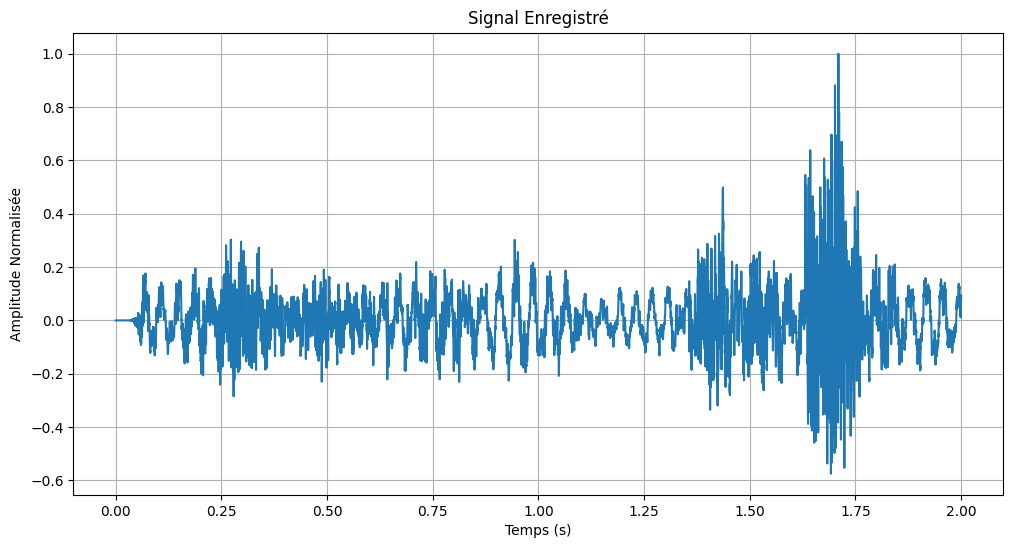

Enregistrement non sauvegardé.
------  Parlez !!!  ------
------  STOP !!!  ------
Lecture de l'enregistrement...


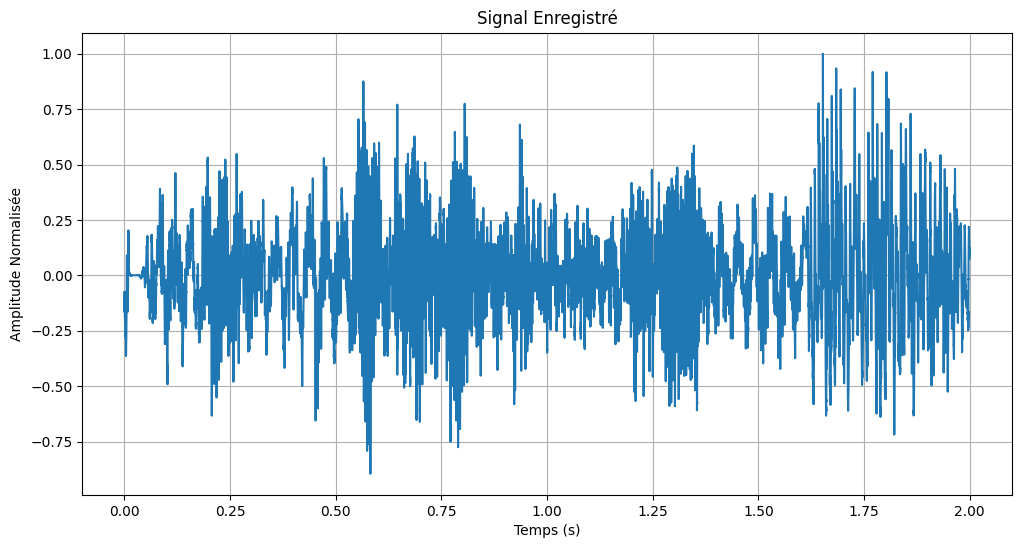

Enregistrement non sauvegardé.
------  Parlez !!!  ------
------  STOP !!!  ------
Lecture de l'enregistrement...


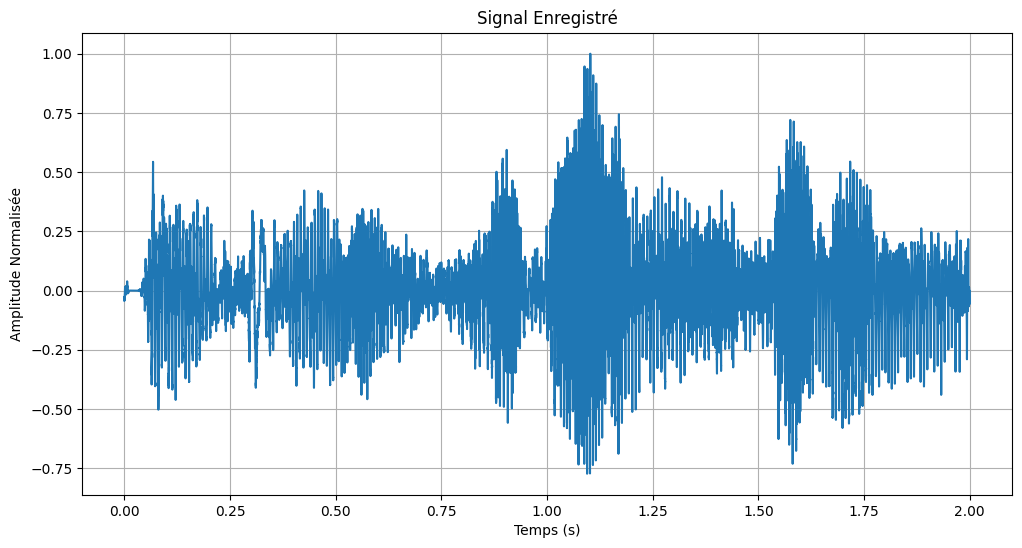

Enregistrement sauvegardé sous test.wav


In [ ]:
import numpy as np
import msicpe.ssl as ssl
import soundfile as sf

Fe = 96000      #fréquence d'échantillonnage
Fp = 9000       #fréquence de modulation
Fc = 3000       #fréquence de coupure pour les filtres passe-bas
T = 2

nom_fichier = None


while nom_fichier ==None:
    nom_fichier, s, t = ssl.RecordModulation(Fe, T)

sf.write('nom_fichier.wav', np.int16(s), Fe)

def modulation(s,t):
    s_module = s*np.cos(2*np.pi*Fp*t)
    return s_module

def f_passebas(S):
    Sf = ssl.Passebas(S,Fe,Fc)
    return Sf

sf.write('myfilename.wav', np.int16(S), Fe)